<a href="https://colab.research.google.com/github/AminaShabbir26/AminaShabbir26/blob/main/customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---Random Forest---
Accuracy: 0.8670
Precision: 0.7679
Recall: 0.4631
F1 Score: 0.5778
Confusion Matrix:
[[1552   55]
 [ 211  182]]


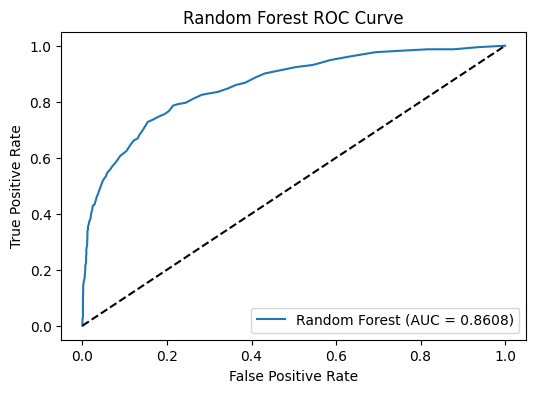

---K-Nearest Neighbors---
Accuracy: 0.8355
Precision: 0.6333
Recall: 0.3868
F1 Score: 0.4803
Confusion Matrix:
[[1519   88]
 [ 241  152]]


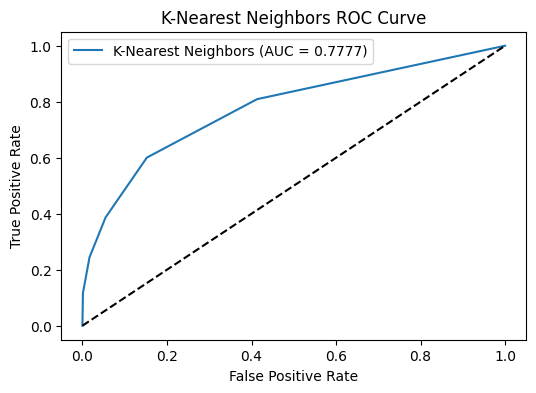

---SVM---
Accuracy: 0.8575
Precision: 0.8000
Recall: 0.3664
F1 Score: 0.5026
Confusion Matrix:
[[1571   36]
 [ 249  144]]


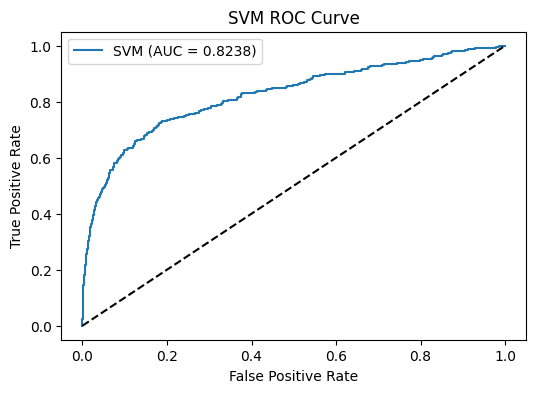

---AdaBoost---
Accuracy: 0.8530
Precision: 0.6787
Recall: 0.4784
F1 Score: 0.5612
Confusion Matrix:
[[1518   89]
 [ 205  188]]


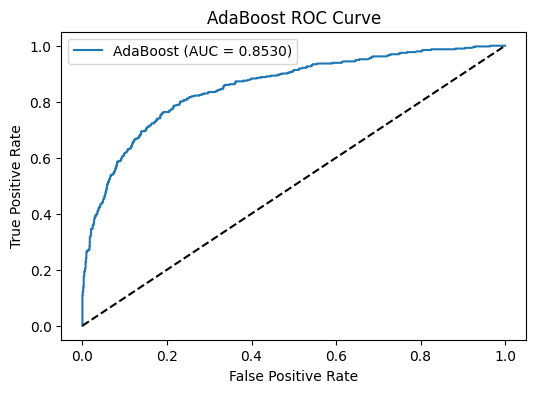

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:52:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


---XGBoost---
Accuracy: 0.8610
Precision: 0.7032
Recall: 0.5064
F1 Score: 0.5888
Confusion Matrix:
[[1523   84]
 [ 194  199]]


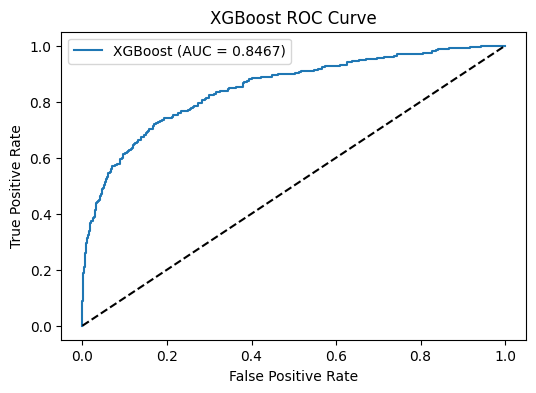

---Bagging---
Accuracy: 0.8505
Precision: 0.6880
Recall: 0.4377
F1 Score: 0.5350
Confusion Matrix:
[[1529   78]
 [ 221  172]]


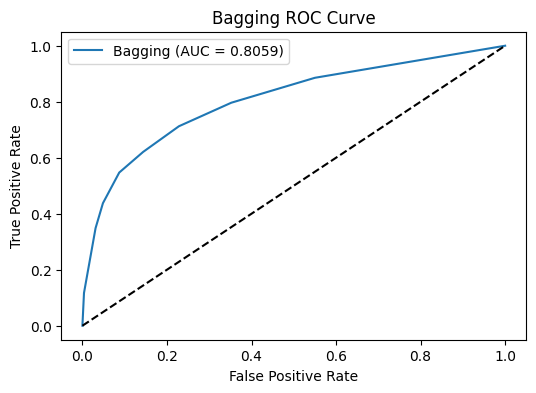

---Gradient Boosting---
Accuracy: 0.8650
Precision: 0.7531
Recall: 0.4656
F1 Score: 0.5755
Confusion Matrix:
[[1547   60]
 [ 210  183]]


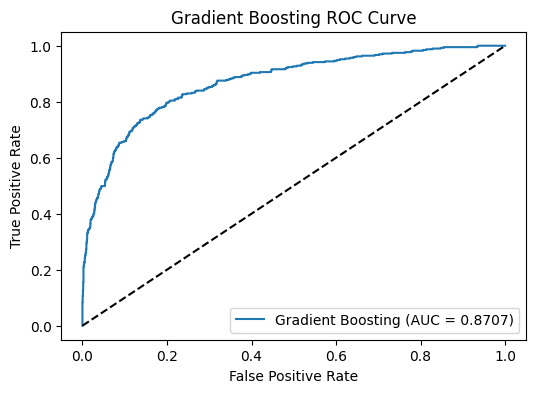


---Comparison of Classifiers---
                     Accuracy  Precision    Recall  F1 Score   ROC AUC
Random Forest          0.8670   0.767932  0.463104  0.577778  0.860790
K-Nearest Neighbors    0.8355   0.633333  0.386768  0.480253  0.777677
SVM                    0.8575   0.800000  0.366412  0.502618  0.823818
AdaBoost               0.8530   0.678700  0.478372  0.561194  0.853028
XGBoost                0.8610   0.703180  0.506361  0.588757  0.846747
Bagging                0.8505   0.688000  0.437659  0.534992  0.805917
Gradient Boosting      0.8650   0.753086  0.465649  0.575472  0.870710


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/churn.csv')

# Data preprocessing
# Encode categorical variables
label_encoder = LabelEncoder()
df['Geography'] = label_encoder.fit_transform(df['Geography'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Split the data into features and target
X = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = df['Exited']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# List of classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Bagging": BaggingClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
}

# Function to evaluate model
def evaluate_model(name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    print(f"---{name}---")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}")

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} ROC Curve')
    plt.legend(loc='best')
    plt.show()

    return acc, prec, rec, f1, roc_auc

# Dictionary to store the results
results = {}

# Apply each classifier
for name, model in classifiers.items():
    results[name] = evaluate_model(name, model)

# Comparison of classifiers
results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']).T
print("\n---Comparison of Classifiers---")
print(results_df)

# Optional: Save results to a CSV file
results_df.to_csv('classifier_comparison.csv')

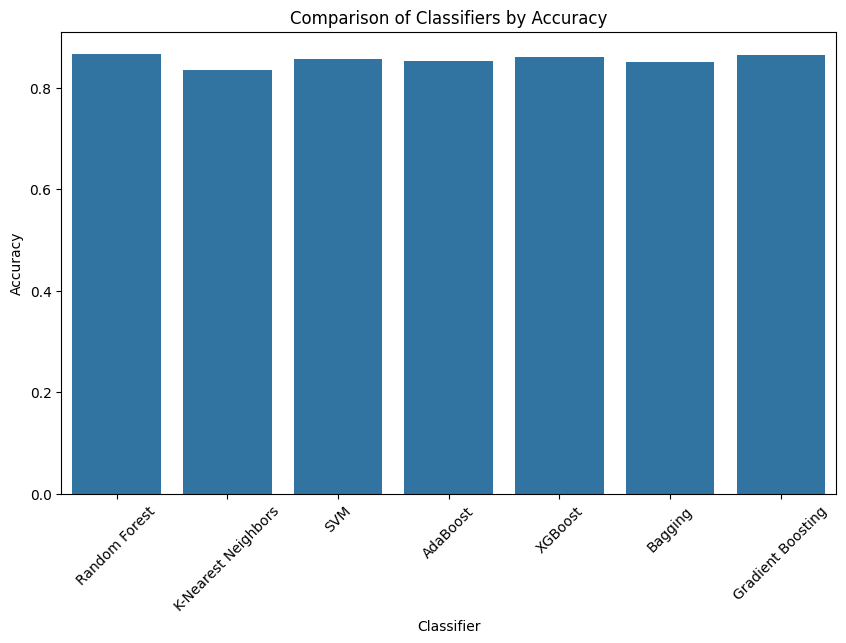

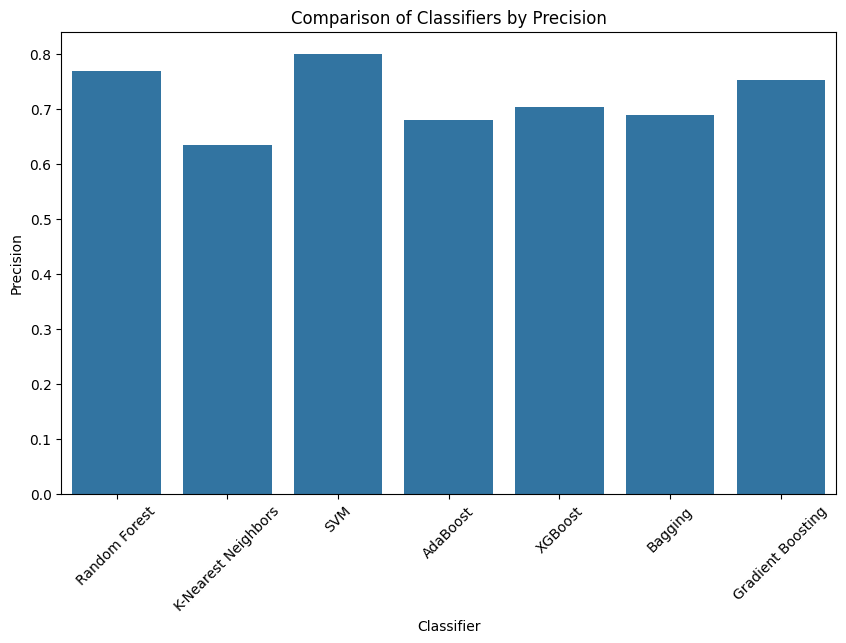

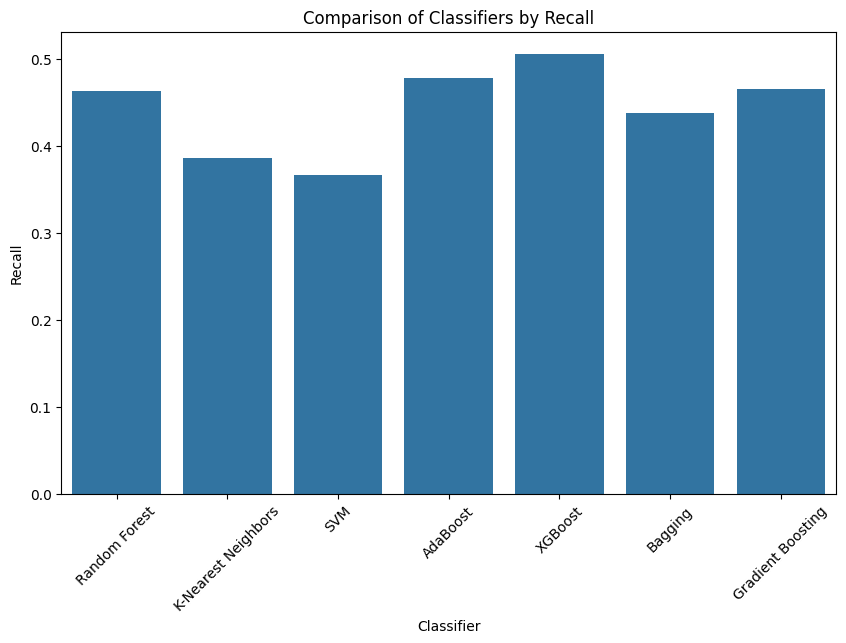

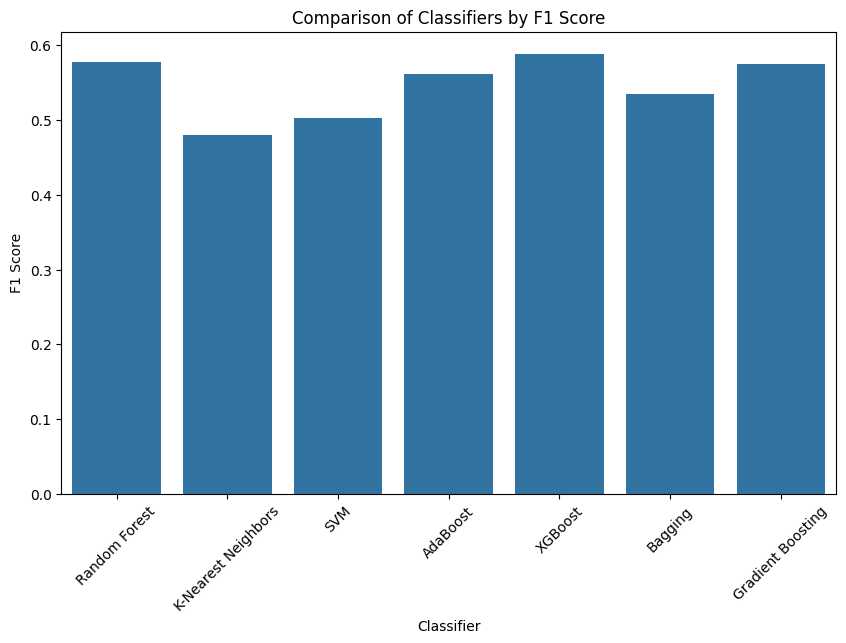

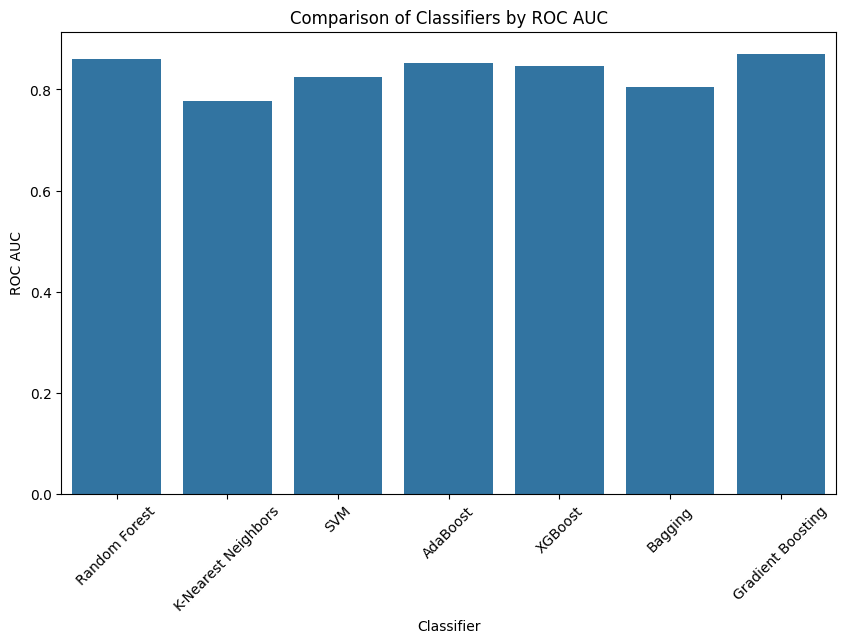

In [ ]:
# Plot the comparison bar graph
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']

# Plotting each metric separately
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=results_df.index, y=results_df[metric])
    plt.title(f'Comparison of Classifiers by {metric}')
    plt.ylabel(metric)
    plt.xlabel('Classifier')
    plt.xticks(rotation=45)
    plt.show()


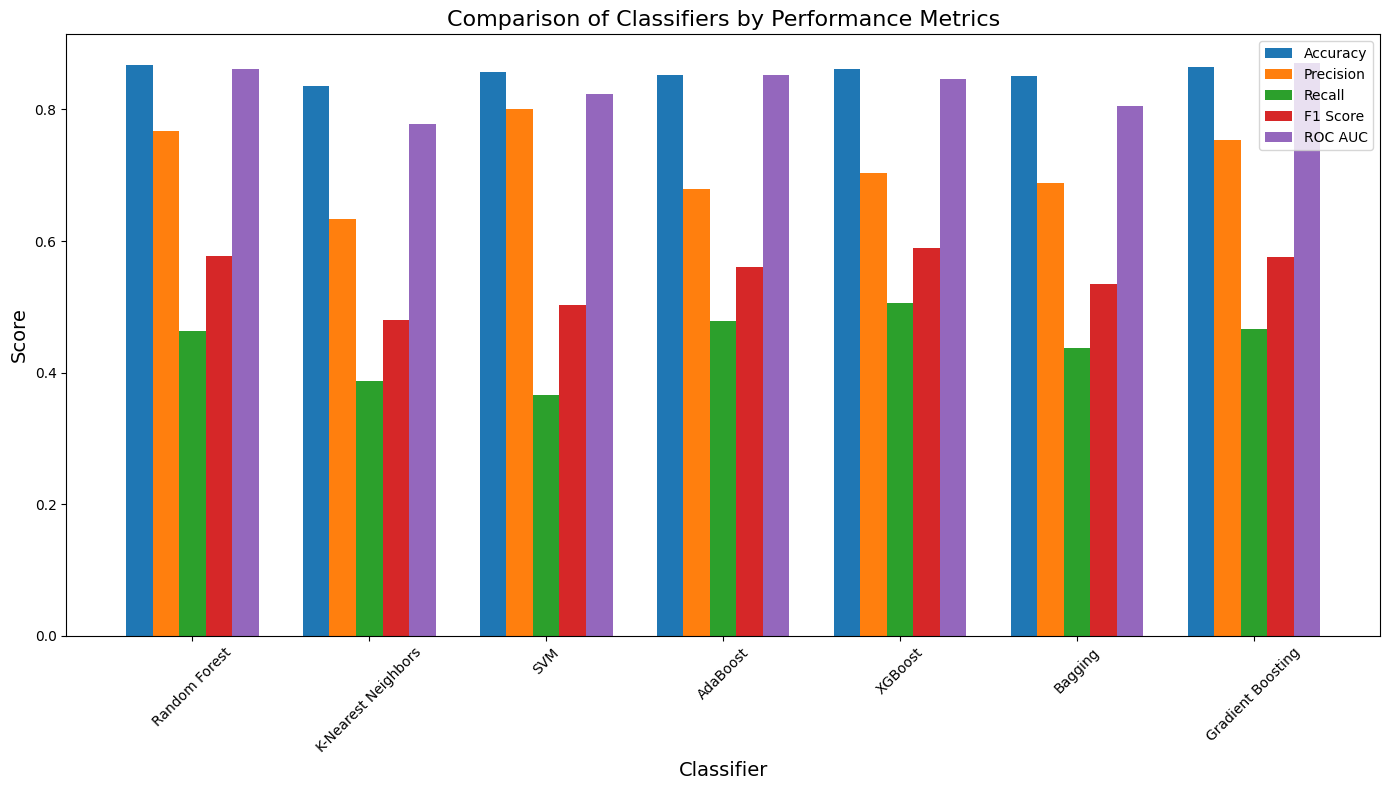

In [ ]:
import numpy as np

# Create a combined bar graph
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
bar_width = 0.15  # Width of the bars
index = np.arange(len(results_df))  # Positions for the bars

# Plotting
plt.figure(figsize=(14, 8))
for i, metric in enumerate(metrics):
    plt.bar(index + i * bar_width, results_df[metric], bar_width, label=metric)

# Adding labels and title
plt.xlabel('Classifier', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title('Comparison of Classifiers by Performance Metrics', fontsize=16)
plt.xticks(index + bar_width * 2, results_df.index, rotation=45)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:23:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


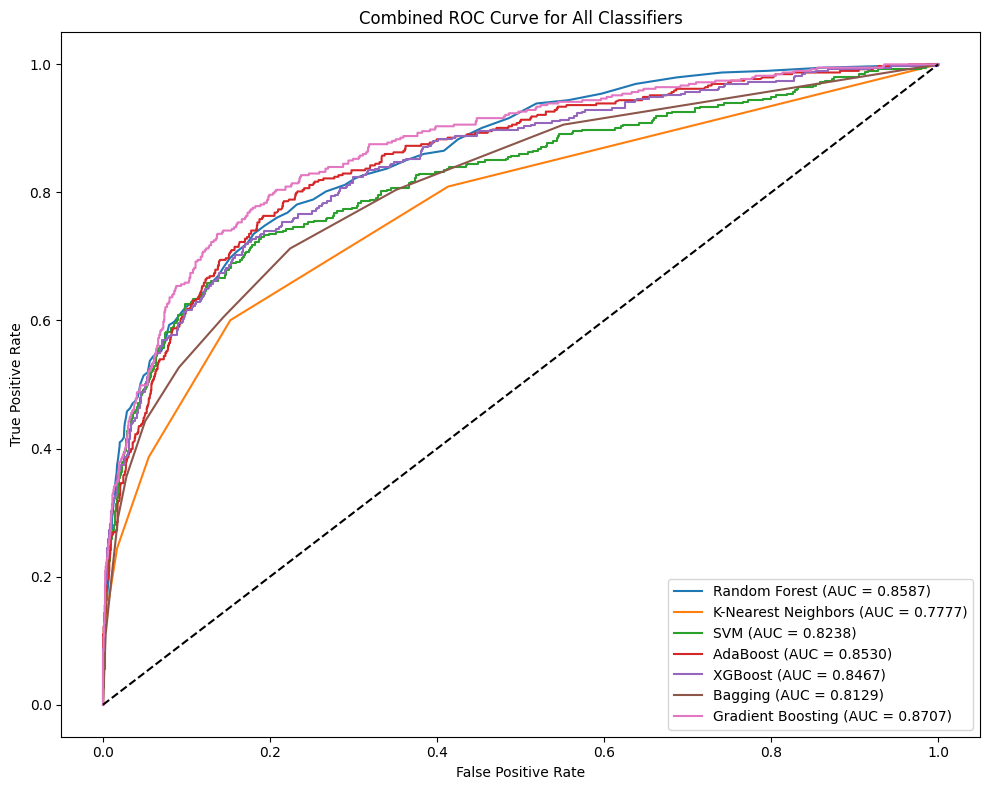

In [ ]:
plt.figure(figsize=(10, 8))

# Plotting ROC curves for each classifier
for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')

# Plot the 45-degree line (random classifier)
plt.plot([0, 1], [0, 1], 'k--')

# Adding labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Combined ROC Curve for All Classifiers')
plt.legend(loc='best')

# Show plot
plt.tight_layout()
plt.show()


---Random Forest without Sampling---
Accuracy: 0.8605
Precision: 0.7192
Recall: 0.4758
F1 Score: 0.5727
Confusion Matrix:
[[1534   73]
 [ 206  187]]


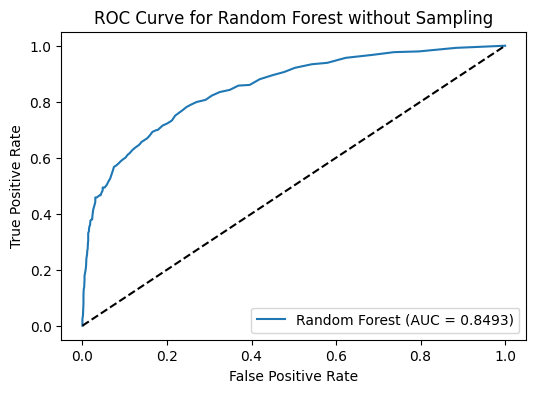

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Initialize the Random Forest Classifier without sampling (bootstrap = False)
rf_no_sampling = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, bootstrap=False, random_state=42)

# Train the model
rf_no_sampling.fit(X_train, y_train)

# Predict on test data
y_pred = rf_no_sampling.predict(X_test)
y_proba = rf_no_sampling.predict_proba(X_test)[:, 1]

# Evaluate the model
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Print evaluation metrics
print("---Random Forest without Sampling---")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Confusion Matrix:\n{cm}")

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest without Sampling')
plt.legend(loc='best')
plt.show()


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:37:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:37:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


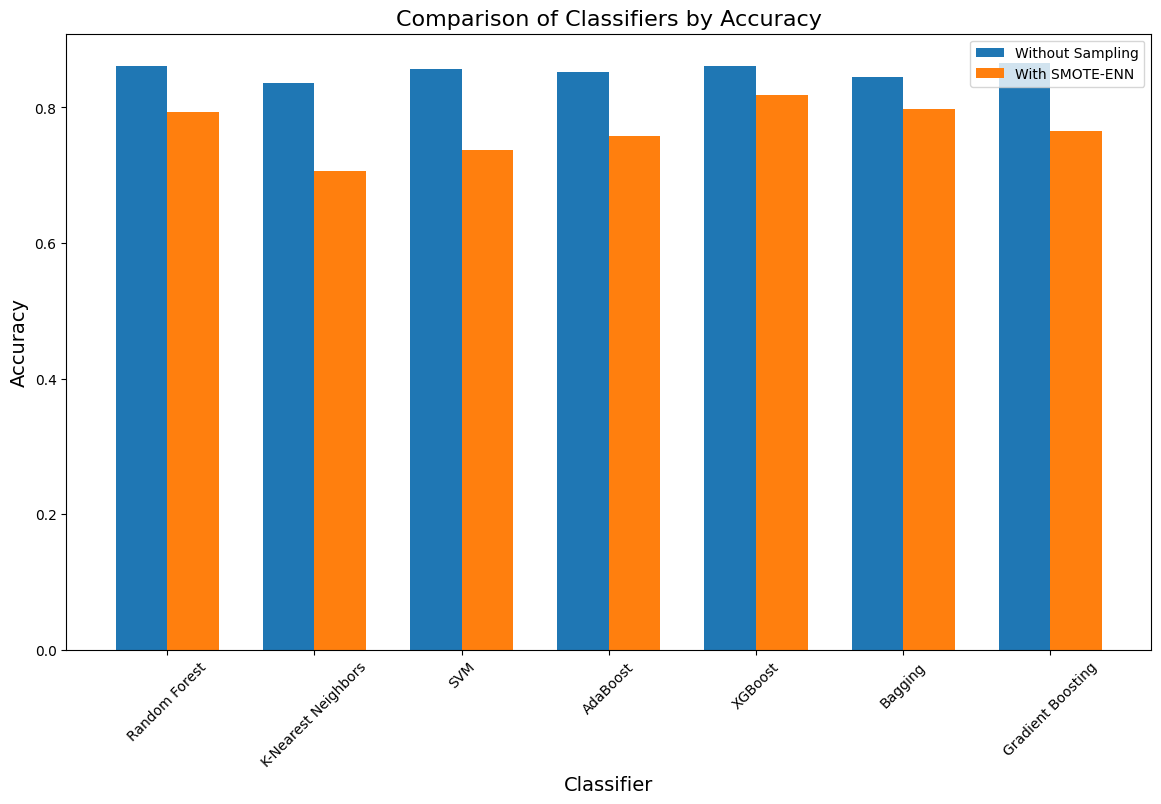

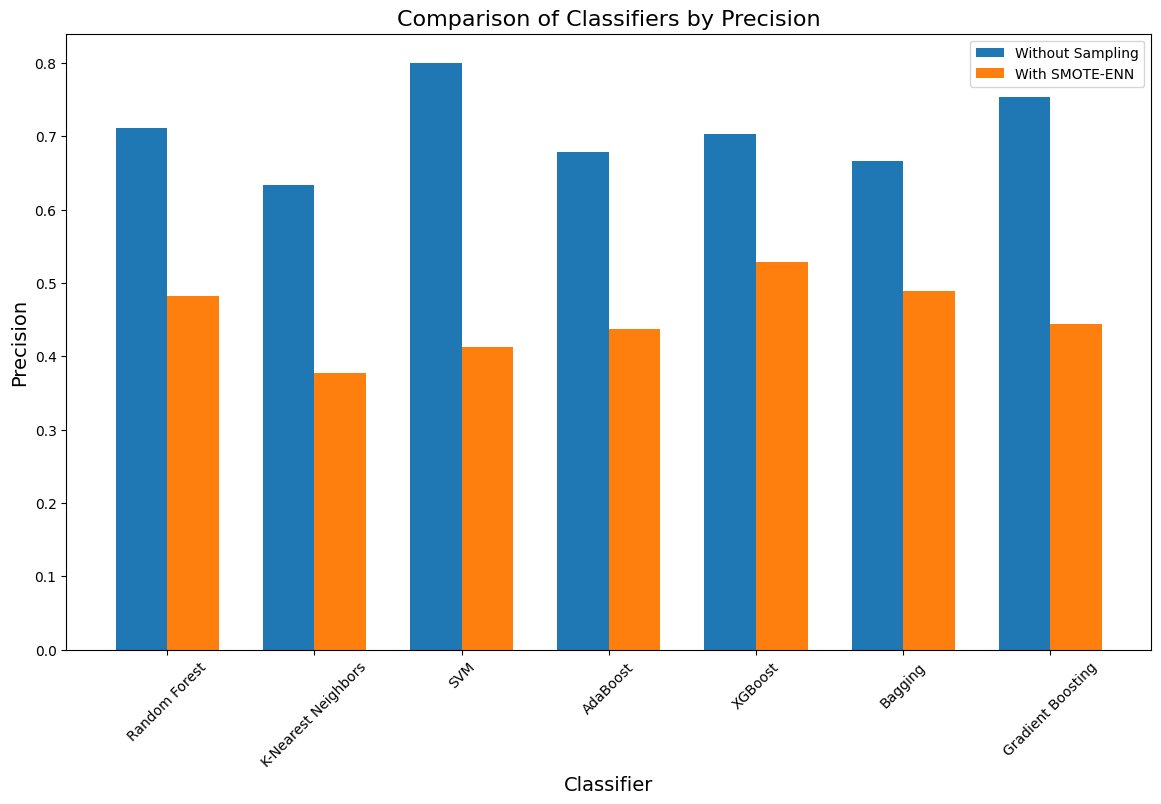

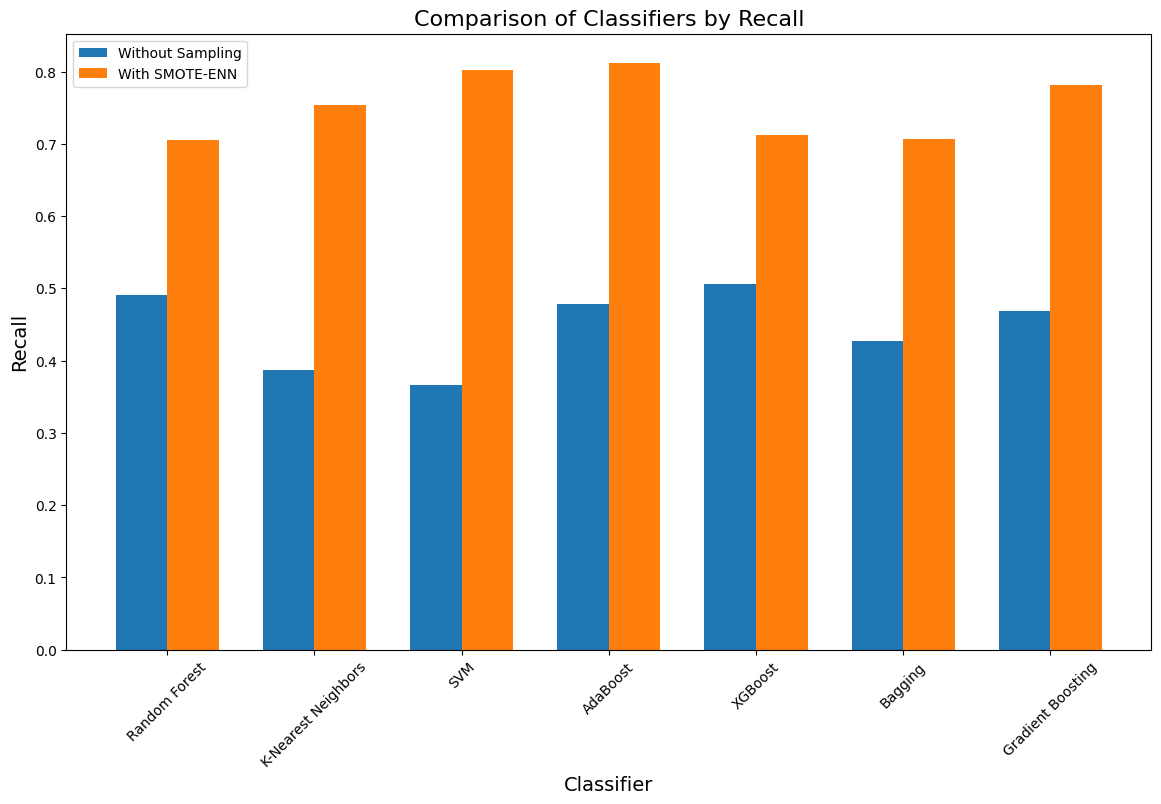

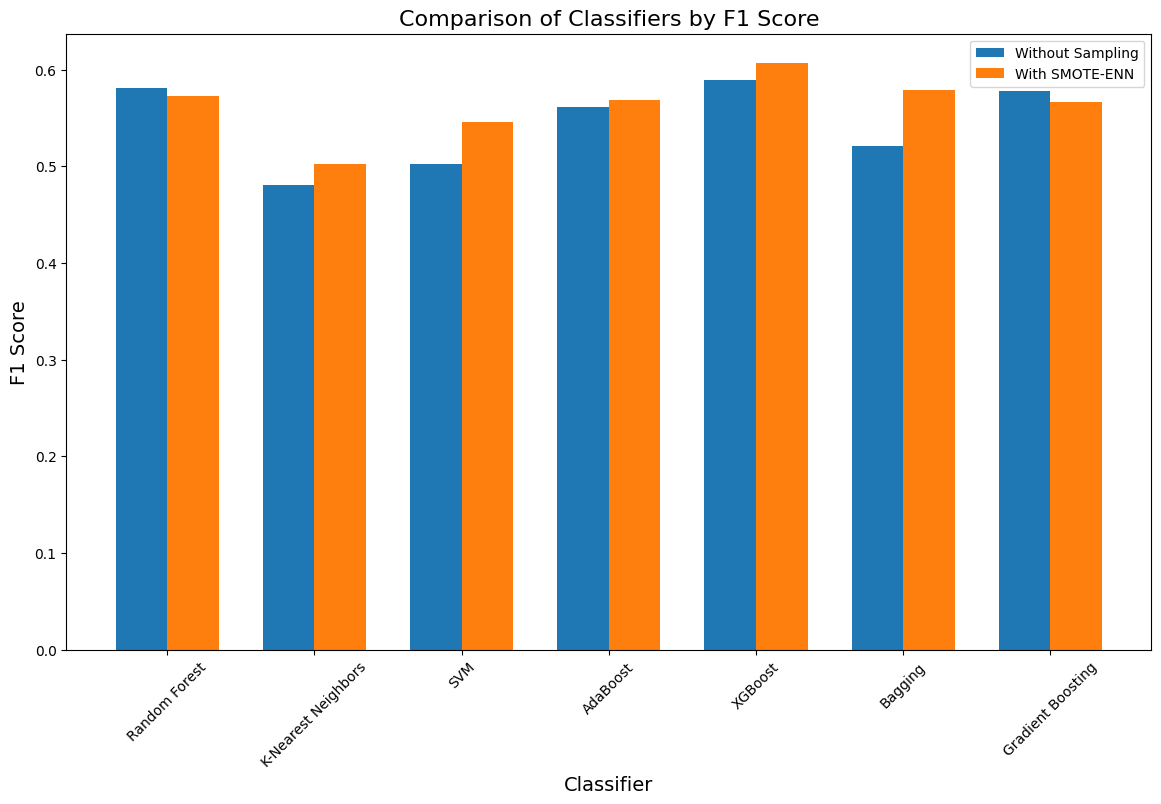

In [ ]:
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(bootstrap=False),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Bagging": BaggingClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
}

# Function to evaluate a model
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return acc, prec, rec, f1

# Load and preprocess the data
df = pd.read_csv('/churn.csv')
label_encoder = LabelEncoder()
df['Geography'] = label_encoder.fit_transform(df['Geography'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
X = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = df['Exited']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize results dictionary
results_no_sampling = {}
results_with_smote_enn = {}

# Evaluate classifiers without sampling technique
for name, model in classifiers.items():
    results_no_sampling[name] = evaluate_model(name, model, X_train, X_test, y_train, y_test)

# Apply SMOTE-ENN
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

# Evaluate classifiers with SMOTE-ENN
for name, model in classifiers.items():
    results_with_smote_enn[name] = evaluate_model(name, model, X_resampled, X_test, y_resampled, y_test)

# Convert results to DataFrame for easy plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
results_no_sampling_df = pd.DataFrame(results_no_sampling, index=metrics).T
results_with_smote_enn_df = pd.DataFrame(results_with_smote_enn, index=metrics).T

# Plot combined bar graph
bar_width = 0.35  # Width of the bars
index = np.arange(len(results_no_sampling_df))  # Positions for the bars

for metric in metrics:
    plt.figure(figsize=(14, 8))
    plt.bar(index, results_no_sampling_df[metric], bar_width, label='Without Sampling')
    plt.bar(index + bar_width, results_with_smote_enn_df[metric], bar_width, label='With SMOTE-ENN')

    plt.xlabel('Classifier', fontsize=14)
    plt.ylabel(metric, fontsize=14)
    plt.title(f'Comparison of Classifiers by {metric}', fontsize=16)
    plt.xticks(index + bar_width / 2, results_no_sampling_df.index, rotation=45)
    plt.legend()
    plt.show()


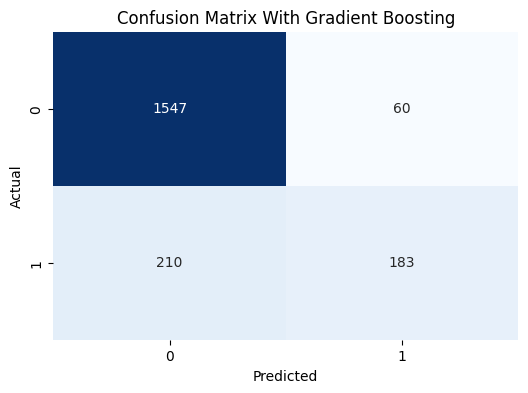

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix data
cm = np.array([[1547, 60],
               [210, 183]])

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix With Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

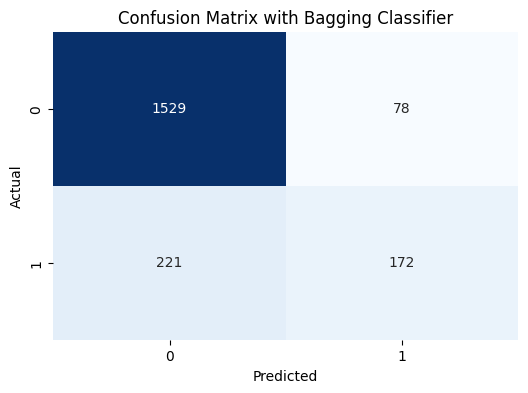

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix data for Bagging classifier
cm_bagging = np.array([[1529, 78],
                       [221, 172]])

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_bagging, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix with Bagging Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


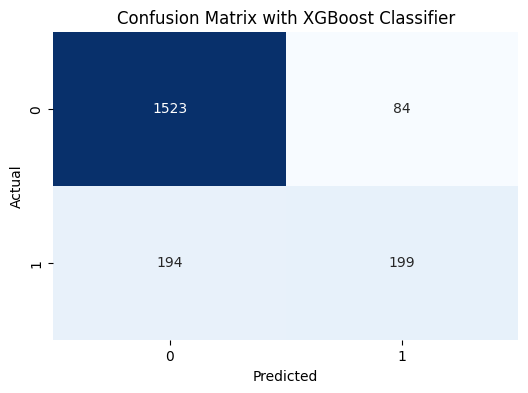

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix data for XGBoost classifier
cm_xgboost = np.array([[1523, 84],
                       [194, 199]])

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgboost, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix with XGBoost Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


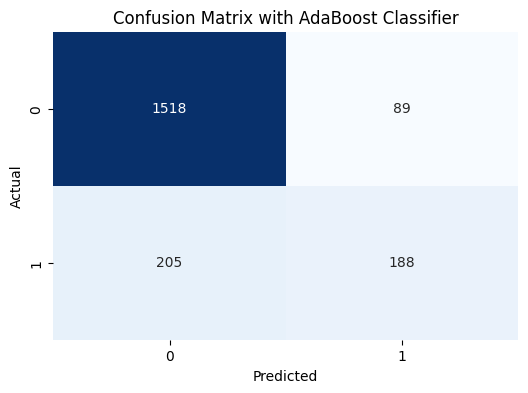

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix data for AdaBoost classifier
cm_adaboost = np.array([[1518, 89],
                        [205, 188]])

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_adaboost, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix with AdaBoost Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


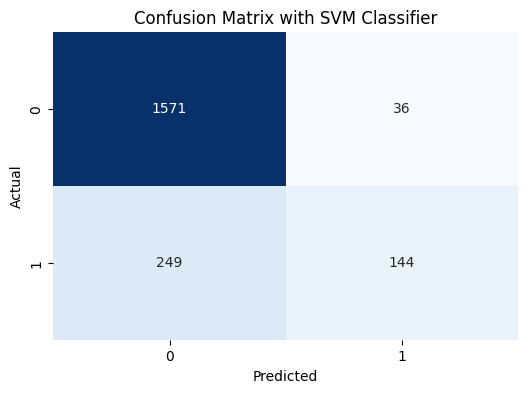

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix data
cm_example = np.array([[1571, 36],
                       [249, 144]])

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_example, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix with SVM Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


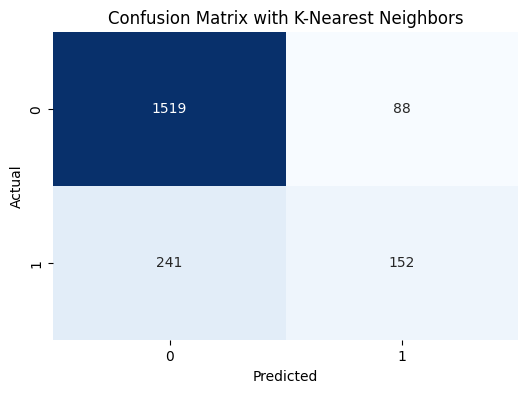

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix data for K-Nearest Neighbors
cm_knn = np.array([[1519, 88],
                   [241, 152]])

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix with K-Nearest Neighbors')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


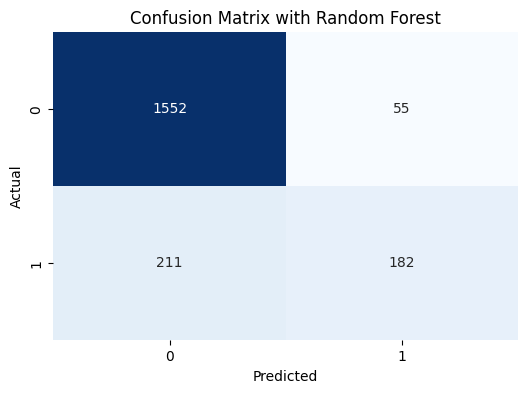

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix data
cm = np.array([[1552, 55],
               [211, 182]])

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix with Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
